# Statistics
This notebook provides an overview of the functions provided by the elephant `statistics` module.


In [1]:
from elephant.statistics import *

All measures presented here require one or two spiketrains as input. We first generate two spiketrains using the elephant `spike_train_generation` module.

In [50]:
from elephant.spike_train_generation import homogeneous_poisson_process, homogeneous_gamma_process
from numpy import array
from quantities import ms, Hz
homogeneous_poisson_process
spiketrain1 = homogeneous_poisson_process(10*Hz, t_start=array(0.) * ms, t_stop=array(10000.) * ms)
spiketrain2 = homogeneous_gamma_process(3, 10*Hz, t_start=array(0.) * ms, t_stop=array(10000.) * ms)

## Rate estimation

Elephant offers three approaches for estimating the underlying rate of a spike train. These functions all take a spike train as input and provide an estimate of the rate using different approaches.


    mean_firing_rate
    instantaneous_rate
    time_histogram
    sskernel



### Mean firing rate

The simplest approach is to assume a stationary firing rate and only use the total number of spikes and the duration of the spike train to calculate the average number of spikes per time unit. This results in a single value for a given spiketrain.

In [51]:
mean_firing_rate(spiketrain1)

array(0.0074) * 1/ms

Additionally, the period within the spike train during which to estimate the firing rate can be further limited using the `t_start` and `t_stop` keyword arguments. Here, we limit the firing rate estimation to the first second of the spiketrain.

In [52]:
mean_firing_rate(spiketrain1, t_start=0*ms, t_stop=1000*ms)

array(0.004) * 1/ms

In some (rare) cases multiple spiketrains can be represented in multidimensional arrays when they contain the same number of spikes. In such cases, the mean firing rate can be calculated for multiple spiketrains at once by specifying the axis the along which to calculate the firing rate. By default, if no axis is specified, all spiketrains are pooled together before estimating the firing rate.

In [53]:
multi_spiketrains = array([[1,2,3],[4,5,6],[7,8,9]])*ms
mean_firing_rate(multi_spiketrains, axis=0, t_start=0*ms, t_stop=5*ms)

array([0.4, 0.4, 0.2]) * 1/ms

### Time histogram
The time histogram is a time resolved way of the firing rate estimation. Here, the spiketrains are binned and either the count or the mean count or the rate of the spiketrains is returned, depending on the `output` parameter. The result is a count (mean count/rate value) for each of the bins evaluated. This is represented as a neo `AnalogSignal` object with the corresponding sampling rate and the count (mean count/rate) values as data.

Here, we compute the counts of spikes in bins of 500 millisecond width.

In [110]:
th1 = time_histogram([spiketrain1], 500*ms)

This returns an `AnalogSignal` where each sample is the count of spike in the bin corresponding to the sampling time.

In [127]:
print('times:', th1.times)
print('counts:', th1[:,0].T)

times: [   0.  500. 1000. 1500. 2000. 2500. 3000. 3500. 4000. 4500. 5000. 5500.
 6000. 6500. 7000. 7500. 8000. 8500. 9000. 9500.] ms
counts: [[2. 2. 4. 4. 6. 2. 9. 3. 4. 3. 3. 1. 4. 7. 4. 4. 3. 1. 3. 5.]] dimensionless


Alternatively, `time_histogram` can also normalize the resulting array to represent a mean counts or a rate.

In [128]:
th2 = time_histogram([spiketrain1], 500*ms, output='rate')

In [129]:
print('times:', th2.times)
print('rate:', th2[:,0].T)

times: [   0.  500. 1000. 1500. 2000. 2500. 3000. 3500. 4000. 4500. 5000. 5500.
 6000. 6500. 7000. 7500. 8000. 8500. 9000. 9500.] ms
rate: [[0.004 0.004 0.008 0.008 0.012 0.004 0.018 0.006 0.008 0.006 0.006 0.002
  0.008 0.014 0.008 0.008 0.006 0.002 0.006 0.01 ]] 1/ms


Additionally, `time_histogram` can be limited to a shorter time period by using the keyword arguments `t_start` and `t_stop`, as described for `mean_firing_rate`.

### Instantaneous rate

The instantaneous rate is, similar to the time histogram (see above), providing a continuous estimate of the underlying firing rate of a spike train. Here, the firing rate is estimated as a convolution of the spiketrain with a firing rate kernel, representing the contribution of a single spike to the firing rate. In contrast to the time histogram, the instantaneous rate provides a smooth firing rate estimate as it does not rely on binning of the spiketrain.

Estimation of the instantaneous rate requires a sampling period on which the firing rate is estimated. Here we use a sampling rate of 50 millisecond.

In [170]:
ir = instantaneous_rate(spiketrain1, 50*ms)

The resulting rate estimate is again an `AnalogSignal` with the sampling rate defined above.

In [171]:
print('sampling rate:', ir.sampling_rate)
print('times:', ir.times)
print('instantaneous rate:', ir[:,0].T)

sampling rate: 0.02 1/ms
times: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190.

Additionally, also the type of kernel used for the convolution can be specified via the `kernel` keyword argument. E.g. to use an gaussian kernel, we specify the following.

In [177]:
from elephant.kernels import GaussianKernel
ir2 = instantaneous_rate(spiketrain1, 20*ms, kernel=GaussianKernel(200*ms))

To compare all three methods of firing rate estimation, we visualize the results of all methods in a common plot.

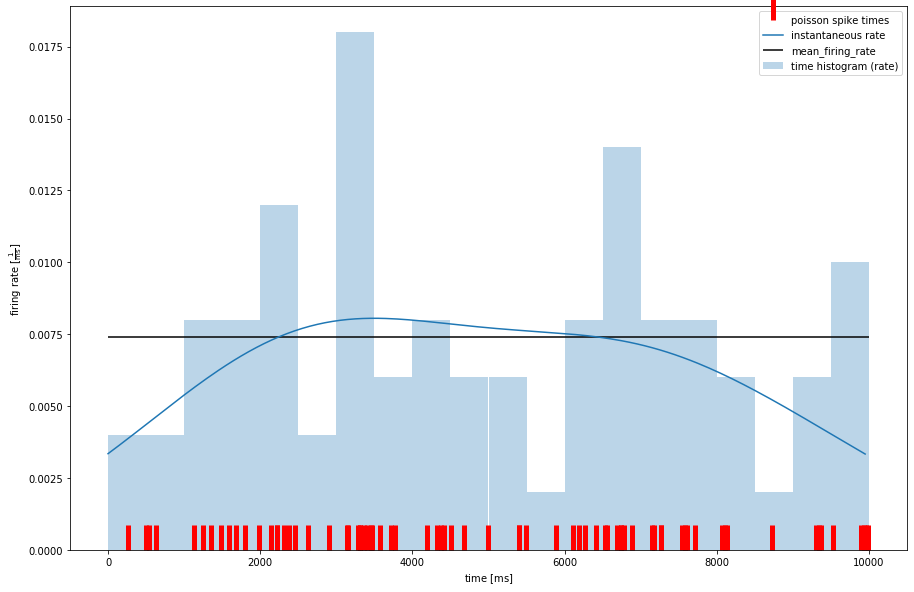

In [197]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

# plotting original spiketrain
plt.plot(spiketrain1, [0]*len(spiketrain1), 'r', marker=2, ms=25, markeredgewidth=5, lw=0, label='poisson spike times')

# mean firing rate
plt.hlines(mean_firing_rate(spiketrain1), xmin=spiketrain1.t_start, xmax=spiketrain1.t_stop, label='mean_firing_rate')

# time histogram
plt.bar(th.times, th.magnitude.flatten(), width=th.sampling_period, align='edge', alpha=0.3, label='time histogram (rate)')

# instantaneous rate
plt.plot(ir.times.rescale(ms), ir.rescale(th.dimensionality).magnitude.flatten(), label='instantaneous rate')

# axis labels and legend
plt.xlabel('time [{}]'.format(spiketrain1.times.dimensionality.latex))
plt.ylabel('firing rate [{}]'.format(th.dimensionality.latex))
plt.legend()
plt.show()

# TODO

## Spike interval statistics

## Statistics across spike trains